In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [30]:
veri = pd.read_csv("sutuketimi.csv")
print(veri)

          tarih  aylik_su_tuketimi_m3
0    01/01/2010              60626396
1    01/02/2010              55607348
2    01/03/2010              60690331
3    01/04/2010              60059862
4    01/05/2010              68130651
..          ...                   ...
136  01/05/2021              91450000
137  01/06/2021              89400000
138  01/07/2021              96100000
139  01/08/2021             103540000
140  01/09/2021              92510000

[141 rows x 2 columns]


In [31]:
x = veri ["tarih"]
y = veri ["aylik_su_tuketimi_m3"]



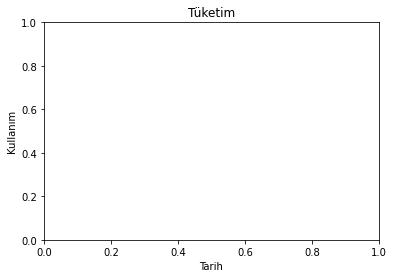

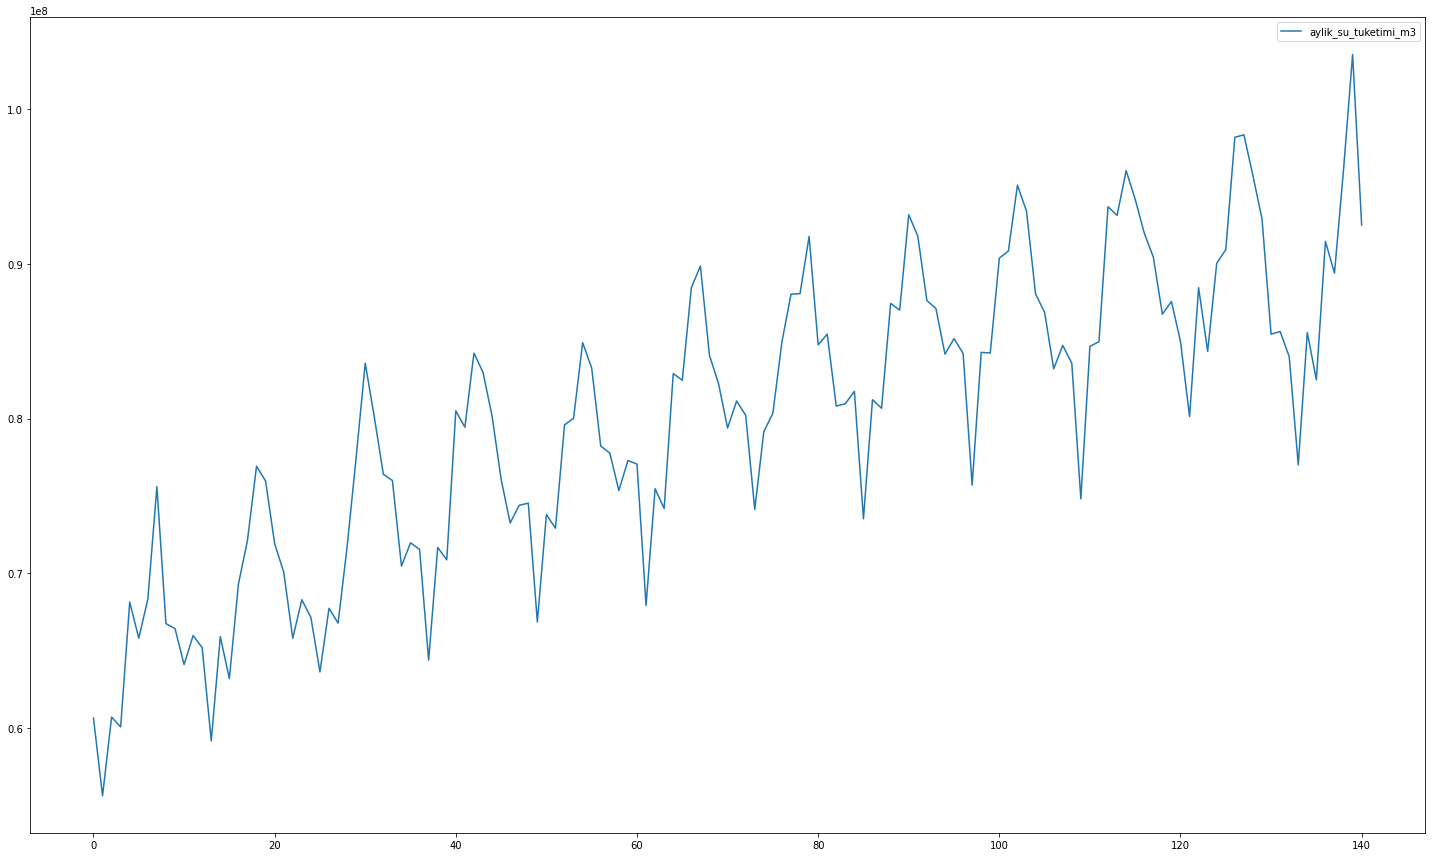

In [35]:
plt.title("Tüketim")
plt.ylabel("Kullanım")
plt.xlabel("Tarih")
veri.plot(figsize=(25,15))
plt.show()

In [36]:
veri = veri [['aylik_su_tuketimi_m3']]
veri.tail()

,aylik_su_tuketimi_m3
136,91450000
137,89400000
138,96100000
139,103540000
140,92510000


In [38]:
gelecekteki_aylar = 10
veri ['Tahmin'] = veri[['aylik_su_tuketimi_m3']].shift (-gelecekteki_aylar)
veri.tail()

,aylik_su_tuketimi_m3,Tahmin
136,91450000,NaN
137,89400000,NaN
138,96100000,NaN
139,103540000,NaN
140,92510000,NaN


In [39]:
X = np.array(veri.drop(['Tahmin'],1))[:-gelecekteki_aylar]
print (X)

[[60626396]
 [55607348]
 [60690331]
 [60059862]
 [68130651]
 [65795212]
 [68313717]
 [75593824]
 [66734410]
 [66419219]
 [64087337]
 [65969091]
 [65178040]
 [59158616]
 [65895328]
 [63178959]
 [69282717]
 [72126045]
 [76919236]
 [75956709]
 [71905674]
 [70069457]
 [65797021]
 [68281562]
 [67137483]
 [63613247]
 [67727010]
 [66769376]
 [71703788]
 [77506799]
 [83573867]
 [80097978]
 [76396279]
 [75990939]
 [70456166]
 [71963543]
 [71538387]
 [64378844]
 [71662936]
 [70859234]
 [80496209]
 [79433474]
 [84224117]
 [82986767]
 [80163154]
 [76076650]
 [73245933]
 [74388464]
 [74527653]
 [66843877]
 [73786120]
 [72908847]
 [79584385]
 [80019990]
 [84905045]
 [83261512]
 [78215223]
 [77767193]
 [75343845]
 [77284887]
 [77052717]
 [67912068]
 [75458980]
 [74176719]
 [82904907]
 [82471775]
 [88453369]
 [89858669]
 [84083159]
 [82263162]
 [79386847]
 [81133032]
 [80206459]
 [74114256]
 [79146850]
 [80340362]
 [84951183]
 [88033179]
 [88076237]
 [91773451]
 [84766595]
 [85454129]
 [80802196]
 [80

C:\Users\Davut Samet Kaplan\AppData\Local\Temp\ipykernel_23620\1074580433.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(veri.drop(['Tahmin'],1))[:-gelecekteki_aylar]


In [42]:
Y = np.array(veri['Tahmin'])[:-gelecekteki_aylar]
print (Y)

[6.4087337e+07 6.5969091e+07 6.5178040e+07 5.9158616e+07 6.5895328e+07
 6.3178959e+07 6.9282717e+07 7.2126045e+07 7.6919236e+07 7.5956709e+07
 7.1905674e+07 7.0069457e+07 6.5797021e+07 6.8281562e+07 6.7137483e+07
 6.3613247e+07 6.7727010e+07 6.6769376e+07 7.1703788e+07 7.7506799e+07
 8.3573867e+07 8.0097978e+07 7.6396279e+07 7.5990939e+07 7.0456166e+07
 7.1963543e+07 7.1538387e+07 6.4378844e+07 7.1662936e+07 7.0859234e+07
 8.0496209e+07 7.9433474e+07 8.4224117e+07 8.2986767e+07 8.0163154e+07
 7.6076650e+07 7.3245933e+07 7.4388464e+07 7.4527653e+07 6.6843877e+07
 7.3786120e+07 7.2908847e+07 7.9584385e+07 8.0019990e+07 8.4905045e+07
 8.3261512e+07 7.8215223e+07 7.7767193e+07 7.5343845e+07 7.7284887e+07
 7.7052717e+07 6.7912068e+07 7.5458980e+07 7.4176719e+07 8.2904907e+07
 8.2471775e+07 8.8453369e+07 8.9858669e+07 8.4083159e+07 8.2263162e+07
 7.9386847e+07 8.1133032e+07 8.0206459e+07 7.4114256e+07 7.9146850e+07
 8.0340362e+07 8.4951183e+07 8.8033179e+07 8.8076237e+07 9.1773451e+07
 8.476

In [58]:



x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=10)


In [59]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [60]:
x_gelecek=veri.drop(['Tahmin'],1)[-gelecekteki_aylar:]
x_gelecek=x_gelecek.tail(gelecekteki_aylar)
x_gelecek=np.array(x_gelecek)
x_gelecek

C:\Users\Davut Samet Kaplan\AppData\Local\Temp\ipykernel_23620\2534331469.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_gelecek=veri.drop(['Tahmin'],1)[-gelecekteki_aylar:]


array([[ 85625596],
       [ 84010000],
       [ 77000000],
       [ 85560000],
       [ 82500000],
       [ 91450000],
       [ 89400000],
       [ 96100000],
       [103540000],
       [ 92510000]], dtype=int64)

In [61]:
tree_tahminleri=tree.predict(x_gelecek)
print(tree_tahminleri)
lr_tahminleri=lr.predict(x_gelecek)
print(x_gelecek)

[91794492. 88076237. 79386847. 91794492. 80340362. 87007974. 88033179.
 90040182. 89400000. 98185060.]
[[ 85625596]
 [ 84010000]
 [ 77000000]
 [ 85560000]
 [ 82500000]
 [ 91450000]
 [ 89400000]
 [ 96100000]
 [103540000]
 [ 92510000]]


NameError: name 'y' is not defined

In [62]:
tree_tahminleri = tree.predict(x_gelecek)
print(tree_tahminleri)
lr_tahminleri =lr.predict(x_gelecek)
print(lr_tahminleri)

[91794492. 88076237. 79386847. 91794492. 80340362. 87007974. 88033179.
 90040182. 89400000. 98185060.]
[85657790.57725775 84450093.87749162 79209951.00429782 85608755.99638613
 83321332.7165041  90011672.0481852  88479247.95545378 93487658.40486869
 99049236.57556227 90804047.4327195 ]


C:\Users\Davut Samet Kaplan\AppData\Local\Temp\ipykernel_23620\2117338342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahmin'] = tahminler


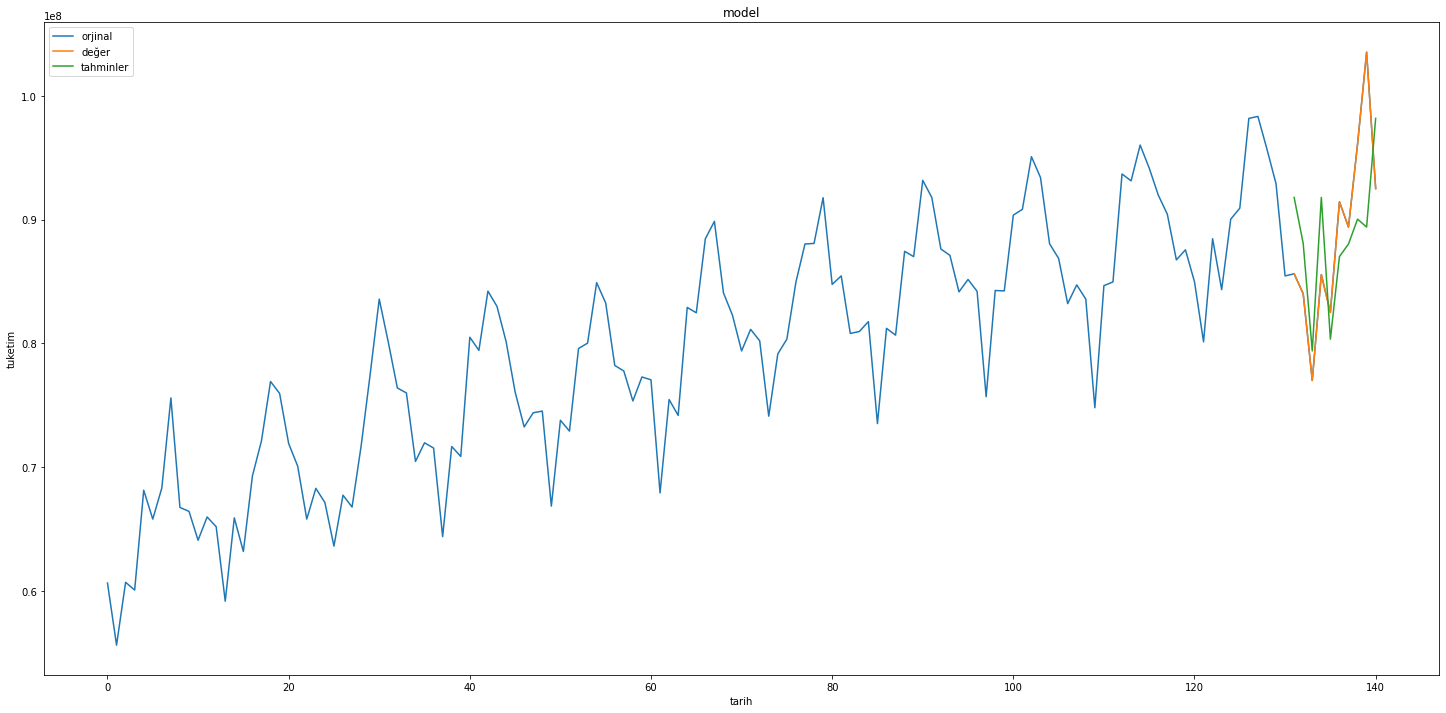

In [63]:
tahminler = tree_tahminleri
valid = veri[X.shape[0]:]
valid['Tahmin'] = tahminler
plt.figure(figsize=(25,12))
plt.title('model')
plt.xlabel('tarih')
plt.ylabel('tuketim')
plt.plot(veri['aylik_su_tuketimi_m3'])
plt.plot(valid[['aylik_su_tuketimi_m3', 'Tahmin']])
plt.legend(['orjinal','değer','tahminler'])
plt.show()

C:\Users\Davut Samet Kaplan\AppData\Local\Temp\ipykernel_23620\740383787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahmin'] = tahminler


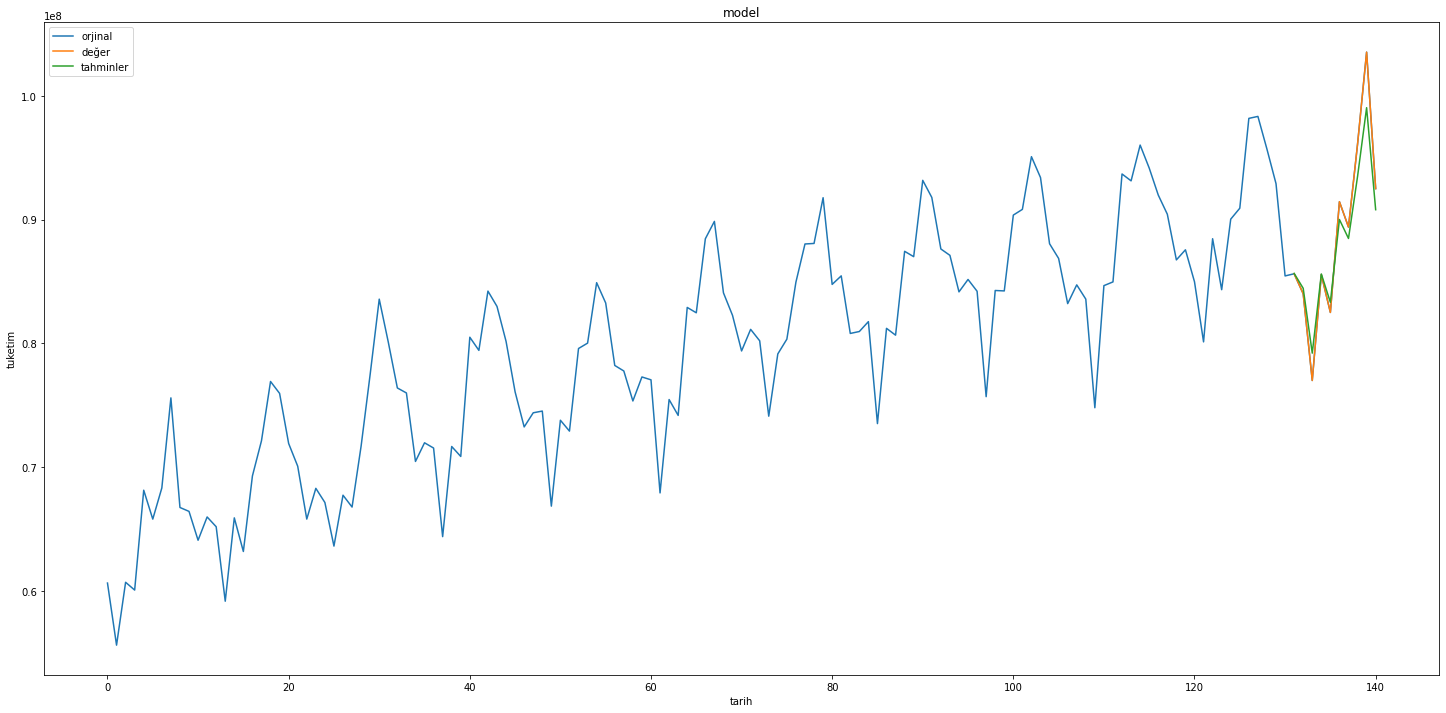

In [64]:
tahminler = lr_tahminleri
valid = veri[X.shape[0]:]
valid['Tahmin'] = tahminler
plt.figure(figsize=(25,12))
plt.title('model')
plt.xlabel('tarih')
plt.ylabel('tuketim')
plt.plot(veri['aylik_su_tuketimi_m3'])
plt.plot(valid[['aylik_su_tuketimi_m3', 'Tahmin']])
plt.legend(['orjinal','değer','tahminler'])
plt.show()